# Week 5: OLS & bivariate analyses of interval ratio variables

## Before regression, lets refresh on standard errors, standard deviations, and variance

### **Arithmetic mean:**
### $ \overline{Y}={\frac {\sum Y_{i}}{n}} $

𝒀 = raw scores/values for variable 𝒀

𝒀 ̅ (y bar) = the mean of 𝒀

𝚺(𝒔𝒊𝒈𝒎𝒂)𝒀= the sum of all the 𝒀 values

𝑵= the number of observation/cases

### **Variance:** A measure of variation for interval-ratio and ordinal variables; it is the average of the squared deviations from the mean.

### $s^2 = \frac{\sum_{}^{}(Y_i - Y)^2} {n-1}$

<img src="sumofsquareddev.png" width="600" align="left">

### **Standard Deviation:** the square root of the variance.

### $s = \sqrt{s^2} = \sqrt{\frac{\sum_{}^{}(Y_i - Y)^2} {n-1}}$

### **Standard error of the mean:** The standard deviation of the sampling distribution of the mean. It describes how much dispersion there is in the sampling distribution of the mean.

### $\sigma_{\overline{Y}} = {\frac{s} {\sqrt{n-1}}}$


### Financial aid example of standard errors and confidence intervals

use egen and collapse to calculate each step in getting standard errors

In [1]:
set more off
*set scheme plotplainblind
*capture log close
*log using w5lecture_ols_log20200218.log
insheet using grants2015_college_affordability20200218.csv, clear
quietly {
rename hgroup hgroupstring
encode hgroupstring, gen(hgrouptemp)
recode hgrouptemp (1=1 "Highest") (2=3 "High") (3=2 "Very high") (4=4 "Some/None"), gen(hgroup)
qui label var igrnt_low "institutional grant $ per fte"
qui label var sgrnt_low "state grant $ per fte"
qui label var hgroup "research level"
}

(8 vars, 581 obs)


In [2]:
%head if _n<5

,year,instnm,stabbr,control,hgroupstring,highdeg,igrnt_low_inc,sgrnt_low_inc,hgrouptemp,hgroup
1,2015,University of Alaska Anchorage,AK,1,Other RU Public,4,3527.888,5126.689,Other RU Public,Some/None
2,2015,University of Alaska Southeast,AK,1,Other RU Public,4,3371.517,3182.448,Other RU Public,Some/None
3,2015,University of Alaska Fairbanks,AK,1,HRA Public,4,6791.518,9233.675,HRA Public,High
4,2015,University of South Alabama,AL,1,HRA Public,4,6839.169,129.9652,HRA Public,High


### Use egen to calculate the mean
### $ \overline{Y}={\frac {\sum Y_{i}}{n}} $

In [3]:
bysort hgroup: egen mn_igrnt_low=mean(igrnt_low)

In [4]:
%head if _n<5

,year,instnm,stabbr,control,hgroupstring,highdeg,igrnt_low_inc,sgrnt_low_inc,hgrouptemp,hgroup,mn_igrnt_low
1,2015,University of Virginia-Main Campus,VA,1,AAU Public,4,29223.34,2988.703,AAU Public,Highest,18664.78
2,2015,Iowa State University,IA,1,AAU Public,4,19647.21,393.319,AAU Public,Highest,18664.78
3,2015,Stony Brook University,NY,1,AAU Public,4,7573.249,5384.245,AAU Public,Highest,18664.78
4,2015,University at Buffalo,NY,1,AAU Public,4,6208.214,4918.043,AAU Public,Highest,18664.78


### Squared deviations using substraction and squaring of vectors
$(Y_i - \overline{Y})^2$

In [5]:
gen sqdv_igrnt_low=(igrnt_low-mn_igrnt_low)^2

### Sum of squared deviations and count of N using collapse with **sum** & **count**
### $\sum_{}^{}(Y_i - Y)^2$

In [6]:
collapse ///
(count) n=igrnt_low ///
(first) mn_igrnt_low ///
(sum) ssqdv_igrnt_low= sqdv_igrnt_low ///
, by(hgroup)

In [7]:
%head

,hgroup,n,mn_igrnt_low,ssqdv_igrnt_low
1,Highest,34,18664.78,2.64e+09
2,Very high,37,13650.38,2.61e+09
3,High,72,13276.54,1.15e+10
4,Some/None,438,4454.736,8.80e+09


### **Standard Deviation:** from stat notation to stata

### $s = \sqrt{s^2} = \sqrt{\frac{\sum_{}^{}(Y_i - Y)^2} {n-1}}$

In [8]:
gen sd_igrnt_low=sqrt(ssqdv_igrnt_low/(n-1))

### **Standard error:** from stat notation to stata ( $\sigma$ is sigma )

### $\sigma_{\overline{Y}} = {\frac{s} {\sqrt{n-1}}}$

In [9]:
gen se_igrnt_low= sd_igrnt_low/sqrt(n-1)

### **Confidence intervals:** from stat notation to stata

### $ CI = \overline{Y} \pm Z * \sigma_{\overline{Y}} $

### 95% $ CI = \overline{Y} \pm 1.96 * \sigma_{\overline{Y}} $

In [10]:
generate hiigrnt_low = mn_igrnt_low + 1.96 * se_igrnt_low
generate loigrnt_low = mn_igrnt_low - 1.96 * se_igrnt_low 

In [11]:
%head hgroup n mn_igrnt_low se_igrnt_low loigrnt_low hiigrnt_low

,hgroup,n,mn_igrnt_low,se_igrnt_low,loigrnt_low,hiigrnt_low
1,Highest,34,18664.78,1557.597,15611.89,21717.67
2,Very high,37,13650.38,1418.308,10870.49,16430.26
3,High,72,13276.54,1507.25,10322.33,16230.75
4,Some/None,438,4454.736,214.7121,4033.901,4875.572


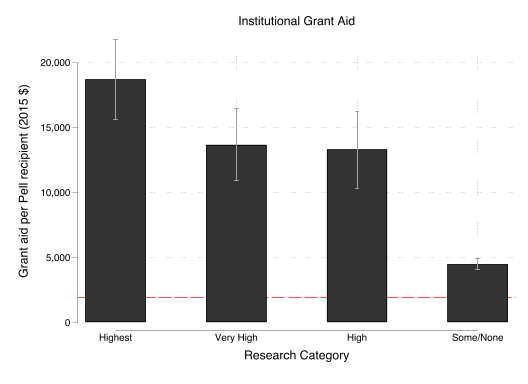

In [12]:
graph twoway (bar mn_igrnt_low hgroup, barw(.5)) ///
(rcap hiigrnt_low loigrnt_low hgroup) , ///
xlabel( 1 "Highest" 2 "Very High" 3 "High" 4 "Some/None", noticks) ///
ytitle("Grant aid per Pell recipient (2015 $)") ///
ylabel(0(5000)20000, format(%10.0fc)) ///
xtitle("Research Category") legend(off) name(igrntbar, replace) ///
title("Institutional Grant Aid")  ///
yline(1936.825, lp(_) lcolor(red) lstyle(foreground)) scheme(plotplainblind)

### Or, we can roll up all those procedures in a few stata commands

In [13]:
quietly {
insheet using grants2015_college_affordability20200218.csv, clear
rename hgroup hgroupstring
encode hgroupstring, gen(hgrouptemp)
recode hgrouptemp (1=1 "Highest") (2=3 "High") (3=2 "Very high") (4=4 "Some/None"), gen(hgroup)
qui label var igrnt_low "institutional grant $ per fte"
qui label var sgrnt_low "state grant $ per fte"
qui label var hgroup "research level"
collapse (mean) mn_igrnt_low=igrnt_low ///
(semean) se_igrnt_low=igrnt_low ///
, by(hgroup)
}
generate hiigrnt_low = mn_igrnt_low + 1.96*se_igrnt_low
generate loigrnt_low = mn_igrnt_low - 1.96*se_igrnt_low

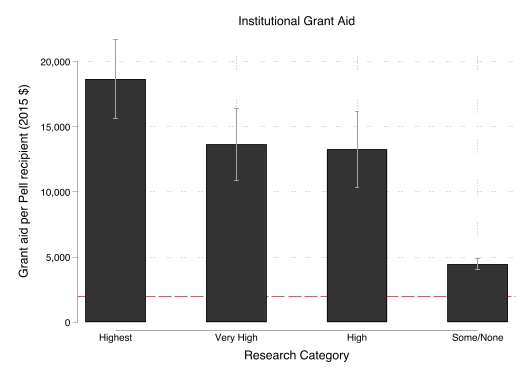

In [14]:
graph twoway (bar mn_igrnt_low hgroup,barw(.5)) ///
(rcap hiigrnt_low loigrnt_low hgroup) , ///
xlabel( 1 "Highest" 2 "Very High" 3 "High" 4 "Some/None", noticks) ///
ytitle("Grant aid per Pell recipient (2015 $)") ///
ylabel(0(5000)20000, format(%10.0fc)) ///
xtitle("Research Category") legend(off) name(igrntbar, replace) ///
title("Institutional Grant Aid") ///
yline(1936.825, lp(_) lcolor(red) lstyle(foreground)) scheme(plotplainblind)

## Onto OLS regression

A tool to estimate bivariate relationship for interval-ratio data

In [15]:
import delimited using loanrepay2013_highestresearch.csv, clear case(preserve)

(encoding automatically selected: ISO-8859-1)
(19 vars, 33 obs)


### First a simple scatter plot

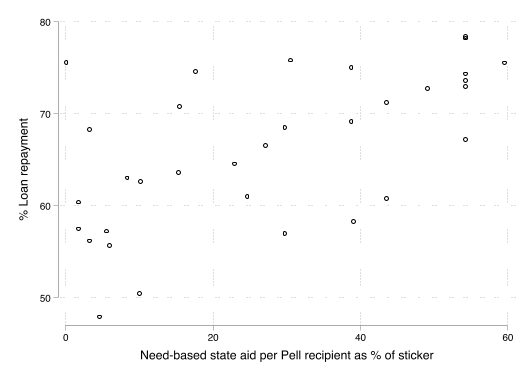

In [16]:
tw scatter Y_lo_inc_rpy X_aid_bysticker, ///
ytitle("% Loan repayment") ///
xtitle("Need-based state aid per Pell recipient as % of sticker") scheme(plotplainblind)

### Let's guestimate a line that minimizes residuals (errors of prediction")

In [ ]:
tw (scatter Y_lo_inc_rpy X_aid_bysticker) ///
(function y = ____ + (____ * x), range(0 60) color(red)), ///
ytitle("% Loan repayment") ///
xtitle("Need-based state aid per Pell recipient as % of sticker") legend(off) scheme(plotplainblind)

### Based on our guestimated line, what is the error/residual for the school with aid covering 30% of sticker and loan repayment of 57%?

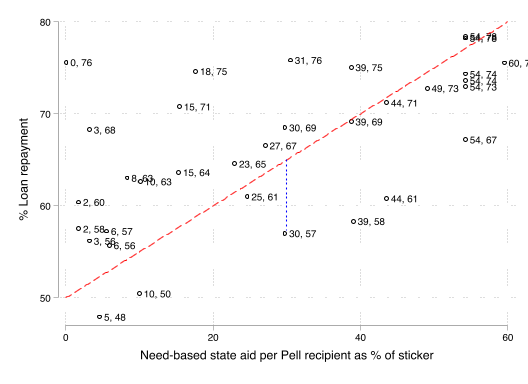

In [17]:
tw (scatter Y_lo_inc_rpy X_aid_bysticker, ///
mlabel(markerlabel)) ///
(function y = 50+(.5*x), range(0 60) color(red)) ///
(scatteri 65 30 57 30, recast(line) lcolor(blue)), ///
ytitle("% Loan repayment") ///
xtitle("Need-based state aid per Pell recipient as % of sticker") legend(off) scheme(plotplainblind)

### How does OLS estimate the following?
* best fit line
* regression equation, $\hat{Y} = \alpha + \beta * X $

[these are the same thing]

### The spacial intuition of covariance

$\beta$ (beta) is covariance of XY divided by th variance of X.

### $\beta = \frac{s_{XY}} {s^2_x}$

### $s_{XY} = \frac{\sum_{}^{}(X_i - \bar{X})(Y_i - \bar{Y})} {n-1}$


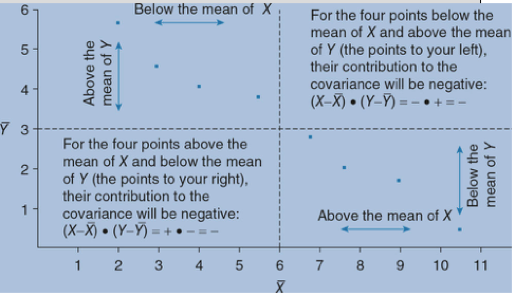

### We could do each step in stata if we wanted

In [18]:
qui {
egen X_mean=mean(X_aid_bysticker) // calculate the mean of X (aid % of sticker price) for all 33 schools
egen Y_mean=mean(Y_lo_inc_rpy) // calculate the mean of Y (% student repaying any loan debt) for all 33 schools

gen covars_xy=(X_aid_bysticker - X_mean) * (Y_lo_inc_rpy - Y_mean)  // calculate the covariances of X & Y for each school
gen sq_dev_x_s2=(X_aid_bysticker - X_mean)^2 // calculate the squared deviations of X for each school
}

### Now display the means, covariances, and squared deviations we just calculated

In [19]:
%head instnm Y_lo_inc_rpy X_aid_bysticker X_mean Y_mean covars_xy sq_dev_x_s2 if _n<5

,instnm,Y_lo_inc_rpy,X_aid_bysticker,X_mean,Y_mean,covars_xy,sq_dev_x_s2
1,University of Arizona,57.2512,5.5465,27.42915,66.22105,196.2841,478.8502
2,University of California-Berkeley,74.3373,54.2455,27.42915,66.22105,217.6482,719.1168
3,University of California-Davis,78.4337,54.2455,27.42915,66.22105,327.4986,719.1168
4,University of California-Irvine,73.6202,54.2455,27.42915,66.22105,198.4181,719.1168


### Now use summarize and some local functions/equations to total covariances and squared deviations and calculate beta

In [20]:
qui {
summarize covars_xy // calculate the sum of covariances for all 33 schools
local sum_s_xy=r(sum)
summarize sq_dev_x_s2 // calculate the sum of squared deviations for X for all 33 schools
local sum_variance_x_s2=r(sum)
local s_xy = round(`sum_s_xy' / (33-1), .01) // calculate covariance of xy
local s2_x = round(`sum_variance_x_s2' / (33-1), .01) // calculate variance of X
}

In [21]:
display "beta = " `s_xy' / `s2_x'

beta = .25139721


### We can then use algebra to solve for the Y intercept or $\alpha$ (alpha)

* Recall the regression equation: $$\hat{Y} = \alpha + \beta \times X $$
* We can substitute $\bar{Y}$ for $\hat{Y}$ and $\bar{X}$ for X and then solve for $\alpha$:
$$\bar{Y} = \alpha + \beta \times \bar{X}$$
* Then subtract $\beta \times \bar{X}$ from both sides of the equation
$$\bar{Y} - \beta \times \bar{X} = \alpha + \beta \times \bar{X} - \beta * \bar{X}$$
$$\bar{Y} - \beta \times \bar{X} = \alpha$$
* Then just reverse the sides of the equation for $\alpha$ and for *$\bar{Y} - \beta \times \bar{X}$ and enter the values we already have for everything on the right side of the equation to solve.
$$\alpha = \bar{Y} - \beta \times \bar{X}$$
$$\alpha = 66.22 - .251 \times 27.43$$
$$\alpha = 59.33$$
* With $\alpha$ we can complete our regression equation as:
$$\hat{Y} = 59.33 + .251 \times X $$

### Or we could just use **regress**. Notice what are listed as **coef.** in 2nd column

In [22]:
regress Y_lo_inc_rpy X_aid_bysticker


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(1, 31)        =     18.02
       Model |  810.501718         1  810.501718   Prob > F        =    0.0002
    Residual |  1393.98357        31  44.9672118   R-squared       =    0.3677
-------------+----------------------------------   Adj R-squared   =    0.3473
       Total |  2204.48528        32  68.8901651   Root MSE        =    6.7058

------------------------------------------------------------------------------
Y_lo_inc_rpy | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
X_aid_byst~r |   .2513833   .0592117     4.25   0.000     .1306203    .3721464
       _cons |   59.32583   2.000107    29.66   0.000     55.24658    63.40507
------------------------------------------------------------------------------


### What about $r^2$, the correlation coefficient?

* It is .368 in the regression output above
* But by calculating it ourselves, we can understand its meaning a little more deeply as the proportion of the total variation in the dependent variable Y (residuals squared), explained by the independent variable, X.

### $$r^2 = \frac{SSR} {SST} = \frac{SST - SSE} {SST}$$

* Sum of Squares Total (SST): Sum of squared deviations for Y. $\sum_{}^{}(Y_i - \bar{Y})^2$
* Sum of Squared Errors (SSE): Sum of squared deviations between observed and predicted Y (variation not explained by regression prediction). $\sum_{}^{}(Y_i - \hat{Y})^2$
* Regression sum of squares (SSR): The amount of variation explained by the regression prediction (calculated by subtracting the unexplained variation of the regression prediction –SSE– from the total variation expressed as the sum of squared deviations SST). This is SST - SSE

### So we need to calculate $\hat{Y}$ (predicted Y) along with SST and SSE by using our regression equation:

$$\hat{Y} = 59.32 + .251 \times X $$

In [23]:
gen Y_hat_loanrpy = 59.33 + .251 * X_aid_bysticker
gen sqdvY_mean = (Y_lo_inc_rpy - Y_mean)^2
gen sqdvY_hat = (Y_lo_inc_rpy - Y_hat_loanrpy)^2

### Checkout Y_hat, squared deviations from mean of Y, and squared deviations from Y_hat for each school in the Head of the data

In [24]:
%head instnm Y_lo_inc_rpy X_aid_bysticker X_mean Y_mean covars_xy sq_dev_x_s2 Y_hat_loanrpy sqdvY_mean sqdvY_hat if _n<5

,instnm,Y_lo_inc_rpy,X_aid_bysticker,X_mean,Y_mean,covars_xy,sq_dev_x_s2,Y_hat_loanrpy,sqdvY_mean,sqdvY_hat
1,University of Arizona,57.2512,5.5465,27.42915,66.22105,196.2841,478.8502,60.72217,80.45825,12.04763
2,University of California-Berkeley,74.3373,54.2455,27.42915,66.22105,217.6482,719.1168,72.94562,65.8735,1.936788
3,University of California-Davis,78.4337,54.2455,27.42915,66.22105,327.4986,719.1168,72.94562,149.1487,30.11905
4,University of California-Irvine,73.6202,54.2455,27.42915,66.22105,198.4181,719.1168,72.94562,54.74738,.4550628


### By summing sqdvY_mean, we get the SST total variation in Y from its mean.

Then we can see how much of this variation is explained by the regression by subtracting what is not explained -- i.e. the SSE sum of squared errors (residuals) from this

In [25]:
qui {
summarize sqdvY_mean // calculate SST, the sum of squared deviations from the mean of Y for all 33 schools
local sst_Y=r(sum)
summarize sqdvY_hat // calculate SSE, the sum of squared errors (residuals) for all 33 schools
local sse_Y=r(sum)
}

In [26]:
display "r2 (r-squared) = " (`sst_Y' - `sse_Y') / `sst_Y' // calculate r_2 r squared

r2 (r-squared) = .36765887


In [27]:
display "f_ratio =" ((`sst_Y' - `sse_Y')/1) / (`sse_Y' / (33-2))

f_ratio =18.024172


### But a scatter plot with a fitted regression line is clearest

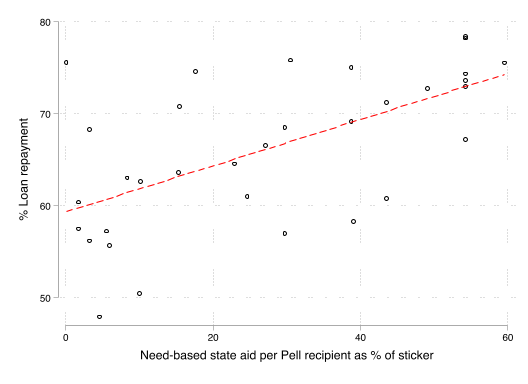

In [28]:
tw (scatter Y_lo_inc_rpy X_aid_bysticker) ///
(lfit Y_lo_inc_rpy X_aid_bysticker, color(red)), ///
ytitle("% Loan repayment") ///
xtitle("Need-based state aid per Pell recipient as % of sticker") legend(off) scheme(plotplainblind)

### How does it compare to our guestimate fitted line?

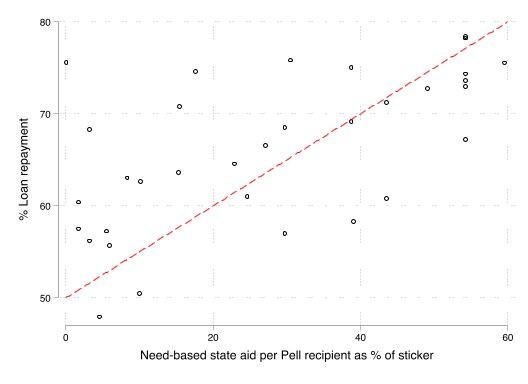

In [29]:
tw (scatter Y_lo_inc_rpy X_aid_bysticker) ///
(function y = 50 + (.5* x), range(0 60) color(red)), ///
ytitle("% Loan repayment") ///
xtitle("Need-based state aid per Pell recipient as % of sticker") legend(off) scheme(plotplainblind)